In [1]:
import numpy as np
import matplotlib.pyplot as plt
import phoebe
import pickle
import tqdm
phoebe.interactive_checks_off()
phoebe.interactive_constraints_off()

In [2]:
label='ce_noise'

### lc with gaussian underestimated and correlated noise

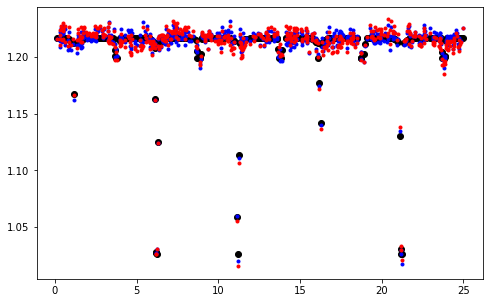

In [3]:
b_true = phoebe.load('data/d_ce.bundle')
b_true.add_constraint('requivsumfrac')
b_true.add_constraint('requivratio')
b_true.add_constraint('teffratio')
b_true.flip_constraint('teffratio', solve_for='teff@secondary')
b_true.flip_constraint('requivsumfrac', solve_for='requiv@secondary')
b_true.flip_constraint('requivratio', solve_for='requiv@primary')

times = b_true['value@times@model']
phases = b_true.to_phase(times)
s=np.argsort(phases)
fluxes = b_true['value@fluxes@model'] #+ sigmas_true

f_true = 0.004
N = len(times)
yerr = 0.0005+0.001 * np.random.rand(N)
fluxes_noise = fluxes + np.abs(f_true * fluxes) * np.random.randn(N)
fluxes_noise += yerr * np.random.randn(N)

%matplotlib inline
plt.figure(figsize=(8,5))
plt.plot(times, fluxes, 'ko')
plt.plot(times, fluxes_noise, 'b.')
# plt.plot(phases, fluxes+yerr * np.random.randn(N), 'y.')
plt.plot(times, fluxes_noise+0.005*np.sin(times), 'r.')

# plt.errorbar(x=times, y=fluxes+yerr * np.random.randn(N), yerr=yerr)
# plt.errorbar(x=times, y=fluxes+yerr2 * np.random.randn(N), yerr=yerr2)
# plt.errorbar(x=times, y=fluxes, yerr=np.abs(sigmas_und))
np.savetxt('data/ce_noise.lc', np.array([times, fluxes_noise, yerr]).T)
np.savetxt('data/ce_noise_corr.lc', np.array([times, fluxes_noise+0.005*np.sin(times), yerr]).T)

# MCMC

### gaussian underestimated noise

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import phoebe
import pickle
import tqdm
phoebe.interactive_checks_off()
phoebe.interactive_constraints_off()

from optimize_funcs import *

/home/angela/anaconda3/lib/python3.7/site-packages/phoebe/parameters/parameters.py:9953: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self._value = np.array(value)
100%|██████████| 1/1 [00:00<00:00, 27.80it/s]


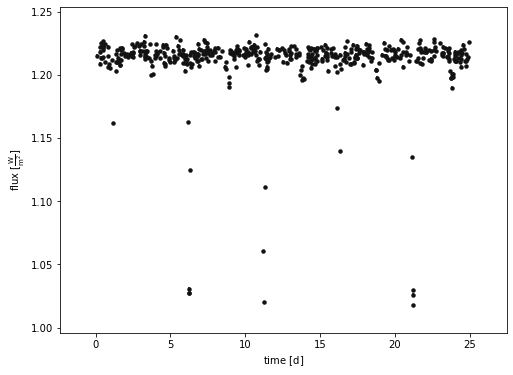

In [14]:
lc_noise = np.loadtxt('data/ce_noise.lc')

b = phoebe.load('data/ce_nm_seq.bundle')
b.set_value('times', context='dataset', dataset='lc01', value=lc_noise[:,0])
b.set_value('fluxes', context='dataset', dataset='lc01', value=lc_noise[:,1])
b.set_value('sigmas', context='dataset', dataset='lc01', value=lc_noise[:,2])
b.set_value('sigmas_lnf', dataset='lc01', value=-5.)
b.run_compute(compute='ellcbnd', model='latest')
afig, mplfig = b.plot(['dataset'], s=0.01, show=True)

In [15]:
mplfig.savefig('figs/lc_noise.png', dpi=300)

In [5]:
# ax = mplfig.axes[0]
# from phoebe.dependencies.autofig.cyclers import _mplcolors
# from cycler import cycler
# custom_cycler = (cycler(color=_mplcolors))

# axins = ax.inset_axes([0.25, 0.1, 0.7, 0.7])
# axins.set_prop_cycle(custom_cycler)
# axins.plot(b_we_gi['value@lnprobabilities'])
# # sub region of the original image
# x1, x2, y1, y2 = -10, 900, 6300, 6400
# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)
# # axins.set_xticklabels('')
# axins.set_yticklabels('')

# ax.indicate_inset_zoom(axins)

In [3]:
params_nonuis = np.array(['incl@binary', 'teffratio', 'requivsumfrac', 'requivratio', 'esinw', 'ecosw', 
                                'teff@primary', 'q',
                                'period@binary', 't0_supconj'])
priors_nonuis = np.array([[50,90], [0.01,10], [0.0001, 1.], [0.1,10], [-1,1], [-1,1], 
                        [3500,20000], [0.1,10],
                        [np.nan,np.nan], [np.nan,np.nan]])
params_wnuis = np.array(['incl@binary', 'teffratio', 'requivsumfrac', 'requivratio', 'esinw', 'ecosw', 
                                'teff@primary', 'q',
                                'period@binary', 't0_supconj', 'sigmas_lnf@lc01'])
priors_wnuis = np.array([[50,90], [0.01,10], [0.0001, 1.], [0.1,10], [-1,1], [-1,1], 
                        [3500,20000], [0.1,10],
                        [np.nan,np.nan], [np.nan,np.nan], [-10.,1.]])

In [4]:
b=add_dist_solver_export(b, params_nonuis, priors_nonuis, 'ce_noise', 'nonuis')
b=add_dist_solver_export(b,params_wnuis, priors_wnuis, 'ce_noise', 'wnuis')

In [5]:
b.save('data/ce_noise.bundle')

'data/ce_noise.bundle'

### gaussian underestimated + correlated noise

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import phoebe
import pickle
import tqdm
phoebe.interactive_checks_off()
phoebe.interactive_constraints_off()

from optimize_funcs import *

/home/angela/anaconda3/lib/python3.7/site-packages/phoebe/parameters/parameters.py:9953: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self._value = np.array(value)
100%|██████████| 1/1 [00:00<00:00, 24.15it/s]


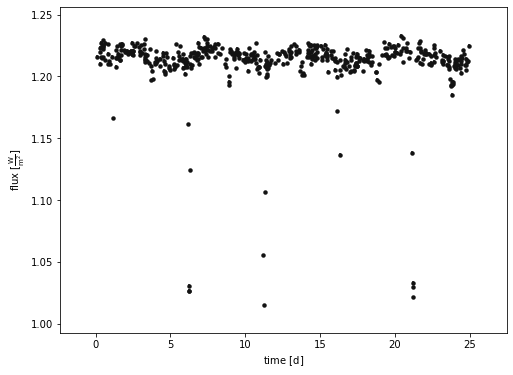

In [12]:
#lc_noise = np.loadtxt('data/ce_noise.lc')
lc_noise = np.loadtxt('data/ce_noise_corr.lc')

b = phoebe.load('data/ce_nm_seq.bundle')
b.set_value('times', context='dataset', dataset='lc01', value=lc_noise[:,0])
b.set_value('fluxes', context='dataset', dataset='lc01', value=lc_noise[:,1])
b.set_value('sigmas', context='dataset', dataset='lc01', value=lc_noise[:,2])
b.set_value('sigmas_lnf', dataset='lc01', value=-5.)
b.run_compute(compute='ellcbnd', model='latest')
%matplotlib inline
afig, mplfig = b.plot(['dataset'], s=0.01, show=True)

In [13]:
mplfig.savefig('figs/lc_corrnoise.png', dpi=300)

In [3]:
# b.add_gaussian_process(dataset='lc01', kernel='sho')
b.add_gaussian_process(dataset='lc01', kernel='matern32')

<ParameterSet: 9 parameters | contexts: compute, feature>

In [4]:
print(b['gaussian_process01'])

ParameterSet: 6 parameters
   kernel@gaussian_process01@f...: matern32
   log_sigma@gaussian_process0...: 0.0
   log_rho@gaussian_process01@...: 0.0
   eps@gaussian_process01@feature: 0.01
   enabled@gaussian_process01@...: True
   enabled@gaussian_process01@...: True


In [5]:
# b['log_omega0@gaussian_process01'] = 0.0001
# b['log_Q@gaussian_process01'] = 0.0001
# b['log_S0@gaussian_process01'] = 0.0001
b['log_sigma@gaussian_process01'] =  1.
b['log_rho@gaussian_process01'] = 10.

100%|██████████| 1/1 [00:00<00:00, 25.82it/s]


(<autofig.figure.Figure | 1 axes | 3 call(s)>,
 <Figure size 1152x864 with 1 Axes>)

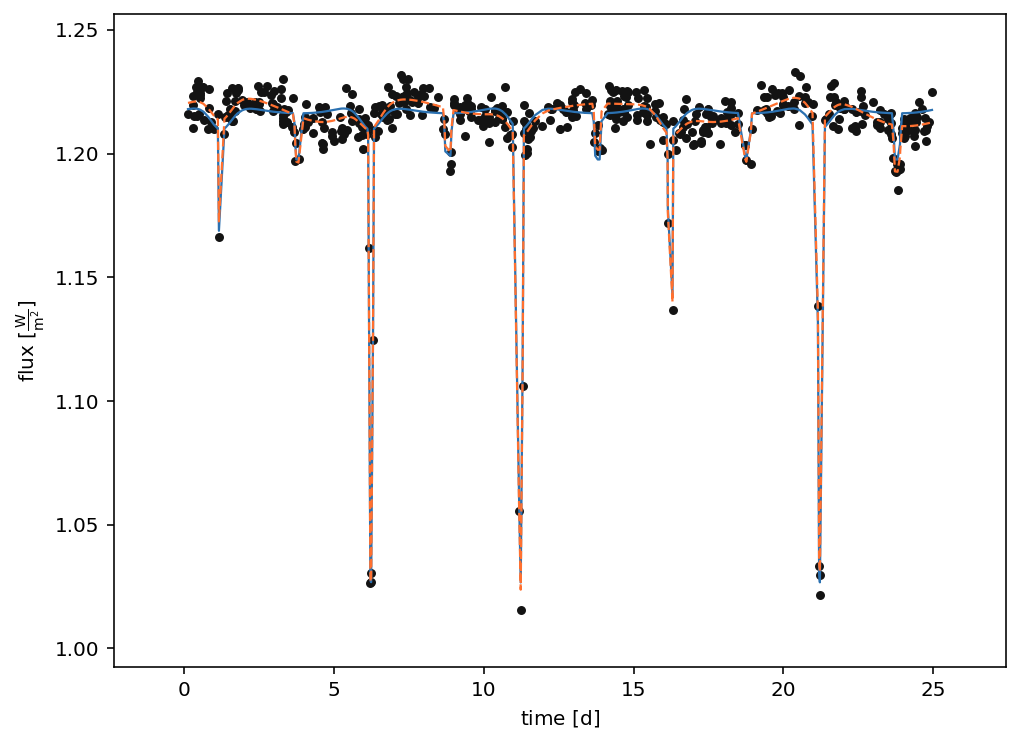

In [6]:
b.run_compute(compute='ellcbnd', model='withGPs', overwrite=True)
%matplotlib qt
b.plot(['dataset', 'latest', 'withGPs'], x='times', s= 0.005, show=True)

In [7]:
# %matplotlib qt
# afig, mplfig = b.plot(c={'withoutGPs': 'red', 'withGPs': 'green'},
#                       ls={'withoutGPs': 'dashed', 'withGPs': 'solid'},
#                       s=0.005,
#                       show=True)

In [8]:
params_nogps = np.array(['incl@binary', 'teffratio', 'requivsumfrac', 'requivratio', 'esinw', 'ecosw', 
                                'teff@primary', 'q',
                                'period@binary', 't0_supconj', 
                                'sigmas_lnf@lc01',
                                ])
priors_nogps = np.array([[50,90], [0.01,10], [0.0001, 1.], [0.1,10], [-1,1], [-1,1], 
                        [3500,20000], [0.1,10],
                        [np.nan,np.nan], [np.nan,np.nan],
                        [-10.,1.],
                        ])
params_wgps = np.array(['incl@binary', 'teffratio', 'requivsumfrac', 'requivratio', 'esinw', 'ecosw', 
                                'teff@primary', 'q',
                                'period@binary', 't0_supconj', 
                                'sigmas_lnf@lc01',
                                'log_rho@gaussian_process01', 'log_sigma@gaussian_process01'])
priors_wgps = np.array([[50,90], [0.01,10], [0.0001, 1.], [0.1,10], [-1,1], [-1,1], 
                        [3500,20000], [0.1,10],
                        [np.nan,np.nan], [np.nan,np.nan],
                        [-10.,1.],
                        [7,12], [0.5,1.5]])

In [9]:
b=add_dist_solver_export(b, params_nogps, priors_nogps, 'ce_noise', 'nogps')
b=add_dist_solver_export(b, params_wgps, priors_wgps, 'ce_noise', 'wgps')

In [10]:
b.save('data/ce_noise_corr.bundle')

'data/ce_noise_corr.bundle'

In [12]:
!scp run* angela@terra.villanova.edu:fitting/phoetting_paper/AAS_ellcbnd/
!scp *.py angela@terra.villanova.edu:fitting/phoetting_paper/AAS_ellcbnd/

run_ce_badinit_0.sh                           100%  271    19.7KB/s   00:00    
run_ce_badinit_teff1_sma_q_p_t0.sh            100%  331    25.4KB/s   00:00    
run_ce_goodinit_0.sh                          100%  275    16.7KB/s   00:00    
run_ce_goodinit_teff1_sma_q_p_t0.sh           100%  335    22.9KB/s   00:00    
run_ce_noise_nogps.sh                         100%  279    20.2KB/s   00:00    
run_ce_noise_nonuis.sh                        100%  283    20.1KB/s   00:00    
run_ce_noise_wgps.sh                          100%  275    18.6KB/s   00:00    
run_ce_noise_wnuis.sh                         100%  279    19.8KB/s   00:00    
run_ce_wrong_0.sh                             100%  263    17.3KB/s   00:00    
run_ce_wrong_teff1_sma_q_p_t0.sh              100%  323    23.6KB/s   00:00    
run_we_badinit_0.sh                           100%  271    21.8KB/s   00:00    
run_we_badinit_teff1_sma_q_p_t0.sh            100%  331    23.3KB/s   00:00    
run_we_goodinit_0.sh                    

# LC PLOTS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import phoebe